## A collection of graphical models which can be generated via HDDM

### *depends_on* - Single Subject

<Axes:>

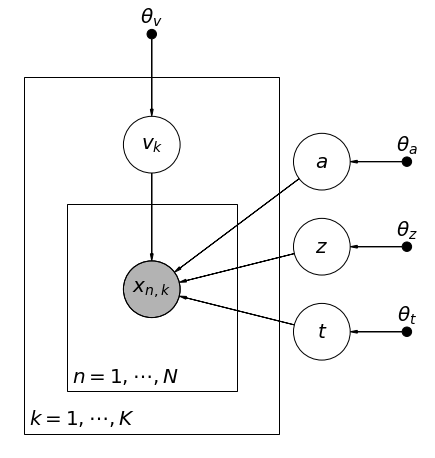

In [90]:
import matplotlib.pyplot as plt
import daft

plt.rcParams['figure.figsize'] = (20, 20)

# Instantiate the PGM.
pgm = daft.PGM(grid_unit = 6, node_unit = 2)

# Parameters
pgm.add_node("v", r"$v_{k}$", 2, 1.85, fontsize = 20)
pgm.add_node("a", r"$a$", 3, 1.75, fontsize = 20)
pgm.add_node("z", r"$z$", 3, 1.25, fontsize = 20)
pgm.add_node("t", r"$t$", 3, .75, fontsize = 20)
pgm.add_node("v_prior", r"$\theta_{v}$", 2, 2.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("a_prior", r"$\theta_{a}$", 3.5, 1.75, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("z_prior", r"$\theta_{z}$", 3.5, 1.25, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("t_prior", r"$\theta_{t}$", 3.5, 0.75, fixed=True, fontsize = 20, offset = (0, 5))

# Data.
pgm.add_node("x", r"$x_{n, k}$", 2, 1, observed=True, fontsize = 20)

# Edges
pgm.add_edge("v", "x", fontsize = 20)
pgm.add_edge("a", "x", fontsize = 20)
pgm.add_edge("z", "x", fontsize = 20)
pgm.add_edge("t", "x", fontsize = 20)

pgm.add_edge("v_prior", "v", fontsize = 20)
pgm.add_edge("a_prior", "a", fontsize = 20)
pgm.add_edge("z_prior", "z", fontsize = 20)
pgm.add_edge("t_prior", "t", fontsize = 20)

# Plates
pgm.add_plate([1.5, 0.5, 1.0, 1], label=r"$n = 1, \cdots, N$", shift=-0.1, fontsize = 20)
pgm.add_plate([1.25, 0.25, 1.5, 2], label=r"$k = 1, \cdots, K$", shift=-0.1, fontsize = 20)

# Render and save.
pgm.render()

### Regression version of *depends_on* - Single Subject

<Axes:>

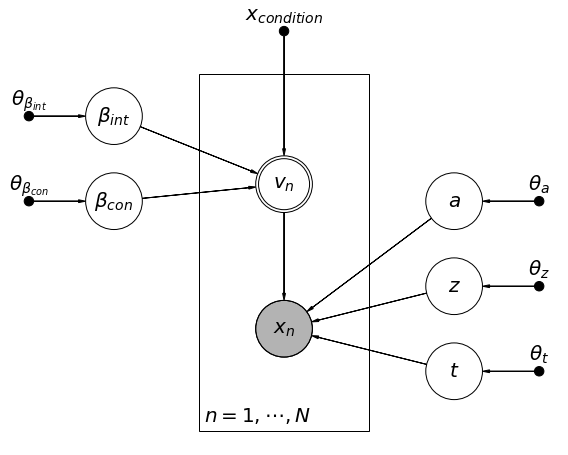

In [158]:
plt.rcParams['figure.figsize'] = (20, 20)

# Instantiate the PGM.
pgm = daft.PGM(grid_unit = 6, node_unit = 2, alternate_style = "inner")

# Parameters
pgm.add_node("v", r"$v_{n}$", 2, 1.85, fontsize = 20, alternate = True)
pgm.add_node("beta_intercept", r"$\beta_{int}$", 1., 2.25, fontsize = 20)
pgm.add_node("beta_intercept_prior", r"$\theta_{\beta_{int}}}$", 0.5, 2.25, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("beta_condition", r"$\beta_{con}$", 1., 1.75, fontsize = 20)
pgm.add_node("beta_condition_prior", r"$\theta_{\beta_{con}}}$", 0.5, 1.75, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("a", r"$a$", 3, 1.75, fontsize = 20)
pgm.add_node("z", r"$z$", 3, 1.25, fontsize = 20)
pgm.add_node("t", r"$t$", 3, .75, fontsize = 20)
pgm.add_node("x_cov", r"$x_{condition}$", 2, 2.75, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("a_prior", r"$\theta_{a}$", 3.5, 1.75, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("z_prior", r"$\theta_{z}$", 3.5, 1.25, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("t_prior", r"$\theta_{t}$", 3.5, 0.75, fixed=True, fontsize = 20, offset = (0, 5))

# Data
pgm.add_node("x", r"$x_{n}$", 2, 1, observed=True, fontsize = 20)


# Edges
pgm.add_edge("beta_condition_prior", "beta_condition", fontsize = 20)
pgm.add_edge("beta_intercept_prior", "beta_intercept", fontsize = 20)
pgm.add_edge("beta_condition", "v", fontsize = 20)
pgm.add_edge("beta_intercept", "v", fontsize = 20)

pgm.add_edge("v", "x", fontsize = 20)
pgm.add_edge("a", "x", fontsize = 20)
pgm.add_edge("z", "x", fontsize = 20)
pgm.add_edge("t", "x", fontsize = 20)

pgm.add_edge("x_cov", "v", fontsize = 20)
pgm.add_edge("a_prior", "a", fontsize = 20)
pgm.add_edge("z_prior", "z", fontsize = 20)
pgm.add_edge("t_prior", "t", fontsize = 20)

# Plates
pgm.add_plate([1.5, 0.5, 1., 2], label=r"$n = 1, \cdots, N$", shift=-0.1, fontsize = 20)

# Render and save.
pgm.render()

$$ v_{n} = \beta_{int} + \beta_{con} * x_{condition, n}$$

### Depends on - Hierarchical (*std_depends = False*)

<Axes:>

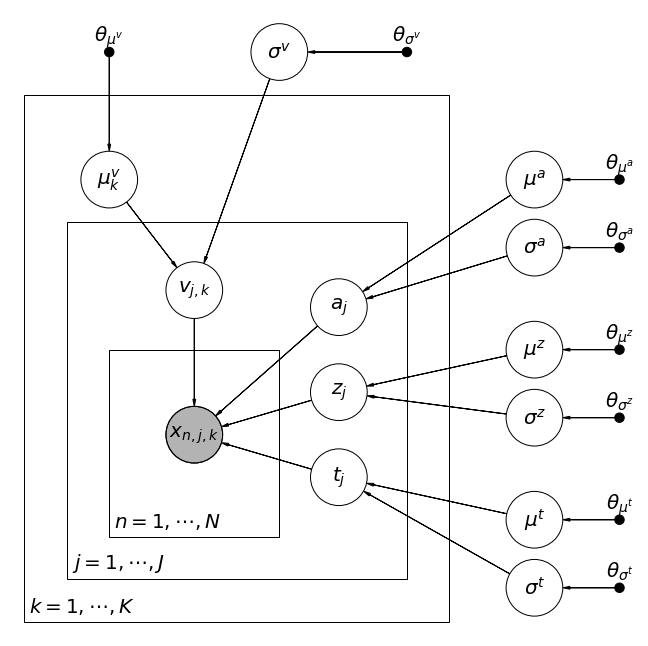

In [228]:
# Instantiate the PGM.
pgm = daft.PGM(grid_unit = 6, node_unit = 2)

# Parameters
pgm.add_node("v", r"$v_{j, k}$", 2, 1.85, fontsize = 20)
pgm.add_node("v_mu", r"$\mu^{v}_{k}$", 1.5, 2.5, fontsize = 20)
pgm.add_node("v_sigma", r"$\sigma^{v}$", 2.5, 3.25, fontsize = 20)
pgm.add_node("v_mu_prior", r"$\theta_{{\mu^{v}}}$", 1.5, 3.25, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("v_sigma_prior", r"$\theta_{\sigma^{v}}}$", 3.25, 3.25, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("a", r"$a_{j}$", 2.85, 1.75, fontsize = 20)
pgm.add_node("a_mu", r"$\mu^{a}$", 4, 2.5, fontsize = 20)
pgm.add_node("a_sigma", r"$\sigma^{a}$", 4, 2.1, fontsize = 20)
pgm.add_node("a_mu_prior", r"$\theta_{{\mu^{a}}}$", 4.5, 2.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("a_sigma_prior", r"$\theta_{\sigma^{a}}}$", 4.5, 2.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("z", r"$z_{j}$", 2.85, 1.25, fontsize = 20)
pgm.add_node("z_mu", r"$\mu^{z}$", 4, 1.5, fontsize = 20)
pgm.add_node("z_sigma", r"$\sigma^{z}$", 4, 1.1, fontsize = 20)
pgm.add_node("z_mu_prior", r"$\theta_{{\mu^{z}}}$", 4.5, 1.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("z_sigma_prior", r"$\theta_{\sigma^{z}}}$", 4.5, 1.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("t", r"$t_{j}$", 2.85, .75, fontsize = 20)
pgm.add_node("t_mu", r"$\mu^{t}$", 4, 0.5, fontsize = 20)
pgm.add_node("t_sigma", r"$\sigma^{t}$", 4, 0.1, fontsize = 20)
pgm.add_node("t_mu_prior", r"$\theta_{{\mu^{t}}}$", 4.5, 0.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("t_sigma_prior", r"$\theta_{\sigma^{t}}}$", 4.5, 0.1, fixed=True, fontsize = 20, offset = (0, 5))

# Data.
pgm.add_node("x", r"$x_{n, j, k}$", 2, 1, observed=True, fontsize = 20)

# Edges
pgm.add_edge("v_mu_prior", "v_mu", fontsize = 20)
pgm.add_edge("v_sigma_prior", "v_sigma", fontsize = 20)
pgm.add_edge("v_mu", "v", fontsize = 20)
pgm.add_edge("v_sigma", "v", fontsize = 20)
pgm.add_edge("v", "x", fontsize = 20)

pgm.add_edge("a_mu_prior", "a_mu", fontsize = 20)
pgm.add_edge("a_sigma_prior", "a_sigma", fontsize = 20)
pgm.add_edge("a_mu", "a", fontsize = 20)
pgm.add_edge("a_sigma", "a", fontsize = 20)
pgm.add_edge("a", "x", fontsize = 20)

pgm.add_edge("z", "x", fontsize = 20)
pgm.add_edge("z_mu_prior", "z_mu", fontsize = 20)
pgm.add_edge("z_sigma_prior", "z_sigma", fontsize = 20)
pgm.add_edge("z_mu", "z", fontsize = 20)
pgm.add_edge("z_sigma", "z", fontsize = 20)

pgm.add_edge("t", "x", fontsize = 20)
pgm.add_edge("t_mu_prior", "t_mu", fontsize = 20)
pgm.add_edge("t_sigma_prior", "t_sigma", fontsize = 20)
pgm.add_edge("t_mu", "t", fontsize = 20)
pgm.add_edge("t_sigma", "t", fontsize = 20)

# Plates.
pgm.add_plate([1.5, 0.5, 1.0, 1], label=r"$n = 1, \cdots, N$", shift=-0.1, fontsize = 20)
pgm.add_plate([1.25, 0.25, 2, 2], label=r"$j = 1, \cdots, J$", shift=-0.1, fontsize = 20)
pgm.add_plate([1., 0., 2.5, 3], label=r"$k = 1, \cdots, K$", shift=-0.1, fontsize = 20)

# Render and save.
pgm.render()

### Depends on - Hierarchical (*std_depends = True*)


<Axes:>

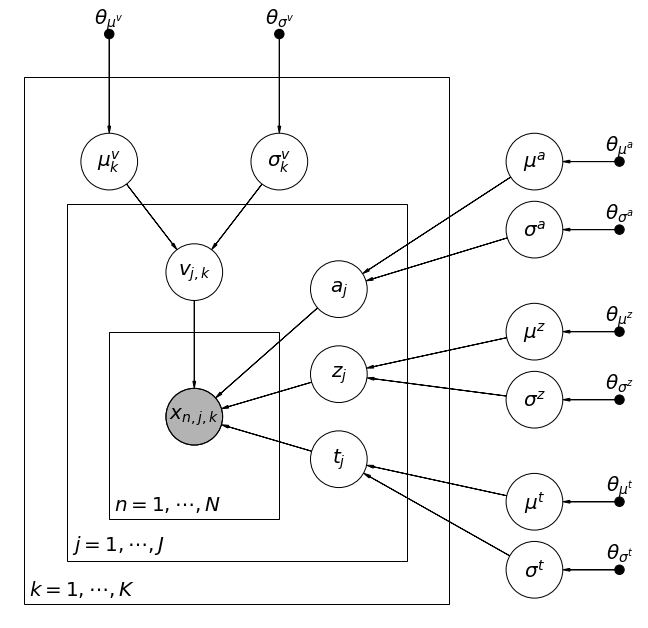

In [8]:
# Instantiate the PGM.
pgm = daft.PGM(grid_unit = 6, node_unit = 2)

# Parameters
pgm.add_node("v", r"$v_{j, k}$", 2, 1.85, fontsize = 20)
pgm.add_node("v_mu", r"$\mu^{v}_{k}$", 1.5, 2.5, fontsize = 20)
pgm.add_node("v_sigma", r"$\sigma^{v}_{k}$", 2.5, 2.5, fontsize = 20)
pgm.add_node("v_mu_prior", r"$\theta_{{\mu^{v}}}$", 1.5, 3.25, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("v_sigma_prior", r"$\theta_{\sigma^{v}}$", 2.5, 3.25, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("a", r"$a_{j}$", 2.85, 1.75, fontsize = 20)
pgm.add_node("a_mu", r"$\mu^{a}$", 4, 2.5, fontsize = 20)
pgm.add_node("a_sigma", r"$\sigma^{a}$", 4, 2.1, fontsize = 20)
pgm.add_node("a_mu_prior", r"$\theta_{{\mu^{a}}}$", 4.5, 2.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("a_sigma_prior", r"$\theta_{\sigma^{a}}}$", 4.5, 2.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("z", r"$z_{j}$", 2.85, 1.25, fontsize = 20)
pgm.add_node("z_mu", r"$\mu^{z}$", 4, 1.5, fontsize = 20)
pgm.add_node("z_sigma", r"$\sigma^{z}$", 4, 1.1, fontsize = 20)
pgm.add_node("z_mu_prior", r"$\theta_{{\mu^{z}}}$", 4.5, 1.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("z_sigma_prior", r"$\theta_{\sigma^{z}}}$", 4.5, 1.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("t", r"$t_{j}$", 2.85, .75, fontsize = 20)
pgm.add_node("t_mu", r"$\mu^{t}$", 4, 0.5, fontsize = 20)
pgm.add_node("t_sigma", r"$\sigma^{t}$", 4, 0.1, fontsize = 20)
pgm.add_node("t_mu_prior", r"$\theta_{{\mu^{t}}}$", 4.5, 0.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("t_sigma_prior", r"$\theta_{\sigma^{t}}}$", 4.5, 0.1, fixed=True, fontsize = 20, offset = (0, 5))

# Data.
pgm.add_node("x", r"$x_{n, j, k}$", 2, 1, observed=True, fontsize = 20)

# Edges
pgm.add_edge("v_mu_prior", "v_mu", fontsize = 20)
pgm.add_edge("v_sigma_prior", "v_sigma", fontsize = 20)
pgm.add_edge("v_mu", "v", fontsize = 20)
pgm.add_edge("v_sigma", "v", fontsize = 20)
pgm.add_edge("v", "x", fontsize = 20)

pgm.add_edge("a_mu_prior", "a_mu", fontsize = 20)
pgm.add_edge("a_sigma_prior", "a_sigma", fontsize = 20)
pgm.add_edge("a_mu", "a", fontsize = 20)
pgm.add_edge("a_sigma", "a", fontsize = 20)
pgm.add_edge("a", "x", fontsize = 20)

pgm.add_edge("z", "x", fontsize = 20)
pgm.add_edge("z_mu_prior", "z_mu", fontsize = 20)
pgm.add_edge("z_sigma_prior", "z_sigma", fontsize = 20)
pgm.add_edge("z_mu", "z", fontsize = 20)
pgm.add_edge("z_sigma", "z", fontsize = 20)

pgm.add_edge("t", "x", fontsize = 20)
pgm.add_edge("t_mu_prior", "t_mu", fontsize = 20)
pgm.add_edge("t_sigma_prior", "t_sigma", fontsize = 20)
pgm.add_edge("t_mu", "t", fontsize = 20)
pgm.add_edge("t_sigma", "t", fontsize = 20)

# Plates
pgm.add_plate([1.5, 0.5, 1.0, 1], label=r"$n = 1, \cdots, N$", shift=-0.1, fontsize = 20)
pgm.add_plate([1.25, 0.25, 2, 2], label=r"$j = 1, \cdots, J$", shift=-0.1, fontsize = 20)
pgm.add_plate([1., 0., 2.5, 3], label=r"$k = 1, \cdots, K$", shift=-0.1, fontsize = 20)

# Render and save.
pgm.render()

### Regression Model - Hierarchical

<Axes:>

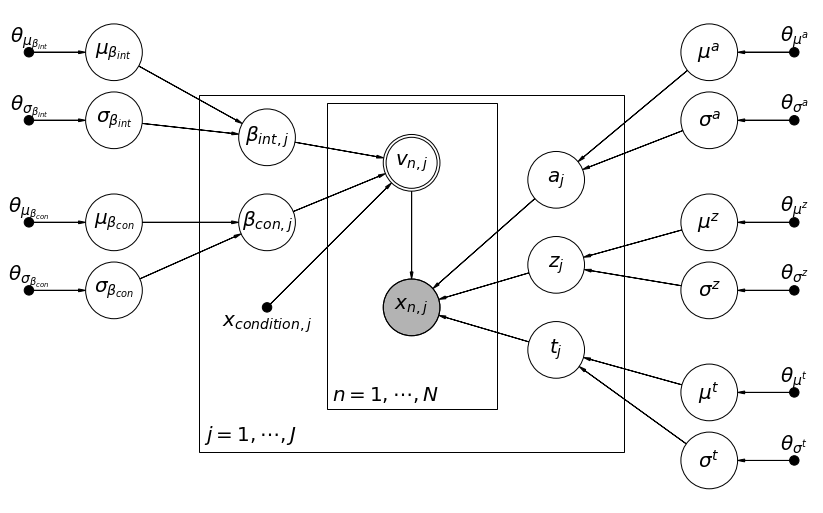

In [221]:
# Instantiate the PGM.
pgm = daft.PGM(grid_unit = 6, node_unit = 2)

# Parameters
pgm.add_node("v", r"$v_{n, j}$", 2, 1.85, fontsize = 20, alternate=True)
pgm.add_node("x_cov", r"$x_{condition, j}$", 1.15, 1, fontsize = 20, fixed = True, offset = (0, -25))

pgm.add_node("beta_intercept", r"$\beta_{int, j}$", 1.15, 2., fontsize = 20)
pgm.add_node("beta_intercept_mu", r"$\mu_{\beta_{int}}$", 0.25, 2.5, fontsize = 20)
pgm.add_node("beta_intercept_sigma", r"$\sigma_{\beta_{int}}$", 0.25, 2.1, fontsize = 20)
pgm.add_node("beta_intercept_mu_prior", r"$\theta_{\mu_{\beta_{int}}}$", -0.25, 2.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("beta_intercept_sigma_prior", r"$\theta_{\sigma_{\beta_{int}}}$", -0.25, 2.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("beta_condition", r"$\beta_{con, j}$", 1.15, 1.5, fontsize = 20)
pgm.add_node("beta_condition_mu", r"$\mu_{\beta_{con}}$", 0.25, 1.5, fontsize = 20)
pgm.add_node("beta_condition_sigma", r"$\sigma_{\beta_{con}}$", 0.25, 1.1, fontsize = 20)
pgm.add_node("beta_condition_mu_prior", r"$\theta_{\mu_{\beta_{con}}}$", -0.25, 1.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("beta_condition_sigma_prior", r"$\theta_{\sigma_{\beta_{con}}}$", -0.25, 1.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("a", r"$a_{j}$", 2.85, 1.75, fontsize = 20)
pgm.add_node("a_mu", r"$\mu^{a}$", 3.75, 2.5, fontsize = 20)
pgm.add_node("a_sigma", r"$\sigma^{a}$", 3.75, 2.1, fontsize = 20)
pgm.add_node("a_mu_prior", r"$\theta_{{\mu^{a}}}$", 4.25, 2.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("a_sigma_prior", r"$\theta_{\sigma^{a}}}$", 4.25, 2.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("z", r"$z_{j}$", 2.85, 1.25, fontsize = 20)
pgm.add_node("z_mu", r"$\mu^{z}$", 3.75, 1.5, fontsize = 20)
pgm.add_node("z_sigma", r"$\sigma^{z}$", 3.75, 1.1, fontsize = 20)
pgm.add_node("z_mu_prior", r"$\theta_{{\mu^{z}}}$", 4.25, 1.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("z_sigma_prior", r"$\theta_{\sigma^{z}}}$", 4.25, 1.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("t", r"$t_{j}$", 2.85, 0.75, fontsize = 20)
pgm.add_node("t_mu", r"$\mu^{t}$", 3.75, 0.5, fontsize = 20)
pgm.add_node("t_sigma", r"$\sigma^{t}$", 3.75, 0.1, fontsize = 20)
pgm.add_node("t_mu_prior", r"$\theta_{{\mu^{t}}}$", 4.25, 0.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("t_sigma_prior", r"$\theta_{\sigma^{t}}}$", 4.25, 0.1, fixed=True, fontsize = 20, offset = (0, 5))

# Data.
pgm.add_node("x", r"$x_{n, j}$", 2, 1, observed=True, fontsize = 20)

# Edges
pgm.add_edge("beta_intercept_mu_prior", "beta_intercept_mu", fontsize = 20)
pgm.add_edge("beta_intercept_sigma_prior", "beta_intercept_sigma", fontsize = 20)
pgm.add_edge("beta_intercept_mu", "beta_intercept", fontsize = 20)
pgm.add_edge("beta_intercept_sigma", "beta_intercept", fontsize = 20)
pgm.add_edge("beta_intercept", "v", fontsize = 20)

pgm.add_edge("beta_condition_mu_prior", "beta_condition_mu", fontsize = 20)
pgm.add_edge("beta_condition_sigma_prior", "beta_condition_sigma", fontsize = 20)
pgm.add_edge("beta_condition_mu", "beta_condition", fontsize = 20)
pgm.add_edge("beta_condition_sigma", "beta_condition", fontsize = 20)
pgm.add_edge("beta_condition", "v", fontsize = 20)

pgm.add_edge("x_cov", "v", fontsize = 20)
pgm.add_edge("v", "x", fontsize = 20)

pgm.add_edge("a_mu_prior", "a_mu", fontsize = 20)
pgm.add_edge("a_sigma_prior", "a_sigma", fontsize = 20)
pgm.add_edge("a_mu", "a", fontsize = 20)
pgm.add_edge("a_sigma", "a", fontsize = 20)
pgm.add_edge("a", "x", fontsize = 20)

pgm.add_edge("z", "x", fontsize = 20)
pgm.add_edge("z_mu_prior", "z_mu", fontsize = 20)
pgm.add_edge("z_sigma_prior", "z_sigma", fontsize = 20)
pgm.add_edge("z_mu", "z", fontsize = 20)
pgm.add_edge("z_sigma", "z", fontsize = 20)

pgm.add_edge("t", "x", fontsize = 20)
pgm.add_edge("t_mu_prior", "t_mu", fontsize = 20)
pgm.add_edge("t_sigma_prior", "t_sigma", fontsize = 20)
pgm.add_edge("t_mu", "t", fontsize = 20)
pgm.add_edge("t_sigma", "t", fontsize = 20)

# Plates
pgm.add_plate([1.5, 0.5, 1.0, 1.7], label=r"$n = 1, \cdots, N$", shift=-0.1, fontsize = 20)
pgm.add_plate([0.75, 0.25, 2.5, 2], label=r"$j = 1, \cdots, J$", shift=-0.1, fontsize = 20)

# Render and save.
pgm.render()

### Regression Model - Hierarchical + *depends_on* (*std_depends = True*)

<Axes:>

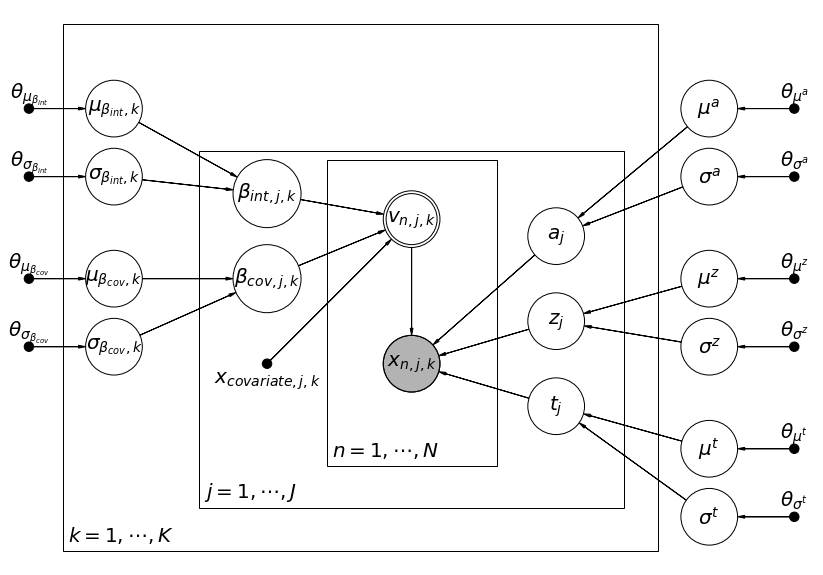

In [25]:
# Instantiate the PGM.
pgm = daft.PGM(grid_unit = 6, node_unit = 2)

# Parameters
pgm.add_node("v", r"$v_{n, j, k}$", 2, 1.85, fontsize = 20, alternate=True)
pgm.add_node("x_cov", r"$x_{covariate, j, k}$", 1.15, 1, fontsize = 20, fixed = True, offset = (0, -25))

pgm.add_node("beta_intercept", r"$\beta_{int, j, k}$", 1.15, 2., fontsize = 20, scale = 1.2)
pgm.add_node("beta_intercept_mu", r"$\mu_{\beta_{int}, k}$", 0.25, 2.5, fontsize = 20)
pgm.add_node("beta_intercept_sigma", r"$\sigma_{\beta_{int}, k}$", 0.25, 2.1, fontsize = 20)
pgm.add_node("beta_intercept_mu_prior", r"$\theta_{\mu_{\beta_{int}}}$", -0.25, 2.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("beta_intercept_sigma_prior", r"$\theta_{\sigma_{\beta_{int}}}$", -0.25, 2.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("beta_covariate", r"$\beta_{cov, j, k}$", 1.15, 1.5, fontsize = 20, scale = 1.2)
pgm.add_node("beta_covariate_mu", r"$\mu_{\beta_{cov}, k}$", 0.25, 1.5, fontsize = 20)
pgm.add_node("beta_covariate_sigma", r"$\sigma_{\beta_{cov}, k}$", 0.25, 1.1, fontsize = 20)
pgm.add_node("beta_covariate_mu_prior", r"$\theta_{\mu_{\beta_{cov}}}$", -0.25, 1.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("beta_covariate_sigma_prior", r"$\theta_{\sigma_{\beta_{cov}}}$", -0.25, 1.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("a", r"$a_{j}$", 2.85, 1.75, fontsize = 20)
pgm.add_node("a_mu", r"$\mu^{a}$", 3.75, 2.5, fontsize = 20)
pgm.add_node("a_sigma", r"$\sigma^{a}$", 3.75, 2.1, fontsize = 20)
pgm.add_node("a_mu_prior", r"$\theta_{{\mu^{a}}}$", 4.25, 2.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("a_sigma_prior", r"$\theta_{\sigma^{a}}}$", 4.25, 2.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("z", r"$z_{j}$", 2.85, 1.25, fontsize = 20)
pgm.add_node("z_mu", r"$\mu^{z}$", 3.75, 1.5, fontsize = 20)
pgm.add_node("z_sigma", r"$\sigma^{z}$", 3.75, 1.1, fontsize = 20)
pgm.add_node("z_mu_prior", r"$\theta_{{\mu^{z}}}$", 4.25, 1.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("z_sigma_prior", r"$\theta_{\sigma^{z}}}$", 4.25, 1.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("t", r"$t_{j}$", 2.85, 0.75, fontsize = 20)
pgm.add_node("t_mu", r"$\mu^{t}$", 3.75, 0.5, fontsize = 20)
pgm.add_node("t_sigma", r"$\sigma^{t}$", 3.75, 0.1, fontsize = 20)
pgm.add_node("t_mu_prior", r"$\theta_{{\mu^{t}}}$", 4.25, 0.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("t_sigma_prior", r"$\theta_{\sigma^{t}}}$", 4.25, 0.1, fixed=True, fontsize = 20, offset = (0, 5))

# Data.
pgm.add_node("x", r"$x_{n, j, k}$", 2, 1, observed=True, fontsize = 20)

# Edges
pgm.add_edge("beta_intercept_mu_prior", "beta_intercept_mu", fontsize = 20)
pgm.add_edge("beta_intercept_sigma_prior", "beta_intercept_sigma", fontsize = 20)
pgm.add_edge("beta_intercept_mu", "beta_intercept", fontsize = 20)
pgm.add_edge("beta_intercept_sigma", "beta_intercept", fontsize = 20)
pgm.add_edge("beta_intercept", "v", fontsize = 20)

pgm.add_edge("beta_covariate_mu_prior", "beta_covariate_mu", fontsize = 20)
pgm.add_edge("beta_covariate_sigma_prior", "beta_covariate_sigma", fontsize = 20)
pgm.add_edge("beta_covariate_mu", "beta_covariate", fontsize = 20)
pgm.add_edge("beta_covariate_sigma", "beta_covariate", fontsize = 20)
pgm.add_edge("beta_covariate", "v", fontsize = 20)

pgm.add_edge("x_cov", "v", fontsize = 20)
pgm.add_edge("v", "x", fontsize = 20)

pgm.add_edge("a_mu_prior", "a_mu", fontsize = 20)
pgm.add_edge("a_sigma_prior", "a_sigma", fontsize = 20)
pgm.add_edge("a_mu", "a", fontsize = 20)
pgm.add_edge("a_sigma", "a", fontsize = 20)
pgm.add_edge("a", "x", fontsize = 20)

pgm.add_edge("z", "x", fontsize = 20)
pgm.add_edge("z_mu_prior", "z_mu", fontsize = 20)
pgm.add_edge("z_sigma_prior", "z_sigma", fontsize = 20)
pgm.add_edge("z_mu", "z", fontsize = 20)
pgm.add_edge("z_sigma", "z", fontsize = 20)

pgm.add_edge("t", "x", fontsize = 20)
pgm.add_edge("t_mu_prior", "t_mu", fontsize = 20)
pgm.add_edge("t_sigma_prior", "t_sigma", fontsize = 20)
pgm.add_edge("t_mu", "t", fontsize = 20)
pgm.add_edge("t_sigma", "t", fontsize = 20)

# Plates
pgm.add_plate([1.5, 0.5, 1.0, 1.7], label=r"$n = 1, \cdots, N$", shift=-0.1, fontsize = 20)
pgm.add_plate([0.75, 0.25, 2.5, 2], label=r"$j = 1, \cdots, J$", shift=-0.1, fontsize = 20)
pgm.add_plate([-0.05, 0., 3.5, 3], label=r"$k = 1, \cdots, K$", shift=-0.1, fontsize = 20)

# Render and save.
pgm.render()

### Regression Model - Hierarchical + *depends_on* (*std_depends = False*)

<Axes:>

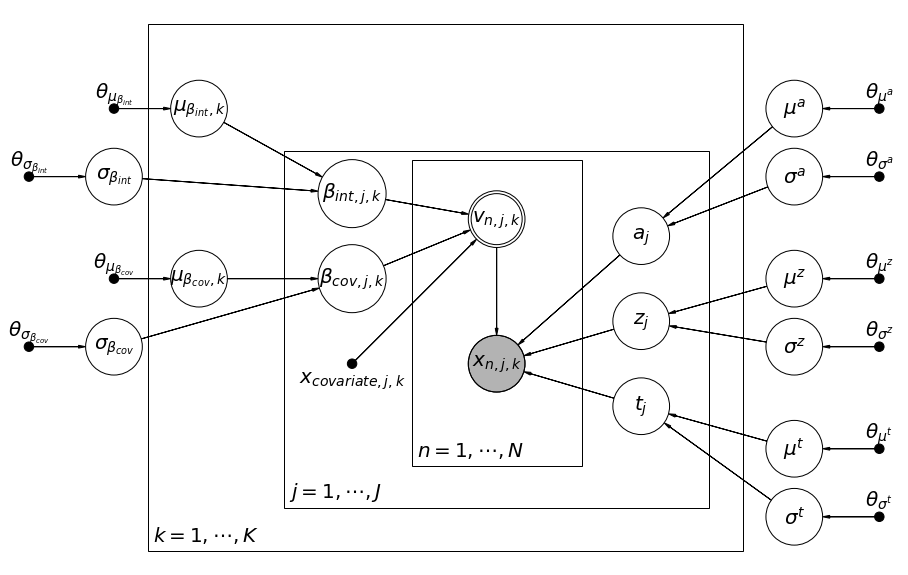

In [27]:
# Instantiate the PGM.
pgm = daft.PGM(grid_unit = 6, node_unit = 2)

# Parameters
pgm.add_node("v", r"$v_{n, j, k}$", 2, 1.85, fontsize = 20, alternate=True)
pgm.add_node("x_cov", r"$x_{covariate, j, k}$", 1.15, 1, fontsize = 20, fixed = True, offset = (0, -25))

pgm.add_node("beta_intercept", r"$\beta_{int, j, k}$", 1.15, 2., fontsize = 20, scale = 1.2)
pgm.add_node("beta_intercept_mu", r"$\mu_{\beta_{int}, k}$", 0.25, 2.5, fontsize = 20)
pgm.add_node("beta_intercept_sigma", r"$\sigma_{\beta_{int}}$", -0.25, 2.1, fontsize = 20)
pgm.add_node("beta_intercept_mu_prior", r"$\theta_{\mu_{\beta_{int}}}$", -0.25, 2.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("beta_intercept_sigma_prior", r"$\theta_{\sigma_{\beta_{int}}}$", -0.75, 2.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("beta_covariate", r"$\beta_{cov, j, k}$", 1.15, 1.5, fontsize = 20, scale = 1.2)
pgm.add_node("beta_covariate_mu", r"$\mu_{\beta_{cov}, k}$", 0.25, 1.5, fontsize = 20)
pgm.add_node("beta_covariate_sigma", r"$\sigma_{\beta_{cov}}$", -0.25, 1.1, fontsize = 20)
pgm.add_node("beta_covariate_mu_prior", r"$\theta_{\mu_{\beta_{cov}}}$", -0.25, 1.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("beta_covariate_sigma_prior", r"$\theta_{\sigma_{\beta_{cov}}}$", -0.75, 1.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("a", r"$a_{j}$", 2.85, 1.75, fontsize = 20)
pgm.add_node("a_mu", r"$\mu^{a}$", 3.75, 2.5, fontsize = 20)
pgm.add_node("a_sigma", r"$\sigma^{a}$", 3.75, 2.1, fontsize = 20)
pgm.add_node("a_mu_prior", r"$\theta_{{\mu^{a}}}$", 4.25, 2.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("a_sigma_prior", r"$\theta_{\sigma^{a}}}$", 4.25, 2.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("z", r"$z_{j}$", 2.85, 1.25, fontsize = 20)
pgm.add_node("z_mu", r"$\mu^{z}$", 3.75, 1.5, fontsize = 20)
pgm.add_node("z_sigma", r"$\sigma^{z}$", 3.75, 1.1, fontsize = 20)
pgm.add_node("z_mu_prior", r"$\theta_{{\mu^{z}}}$", 4.25, 1.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("z_sigma_prior", r"$\theta_{\sigma^{z}}}$", 4.25, 1.1, fixed=True, fontsize = 20, offset = (0, 5))

pgm.add_node("t", r"$t_{j}$", 2.85, 0.75, fontsize = 20)
pgm.add_node("t_mu", r"$\mu^{t}$", 3.75, 0.5, fontsize = 20)
pgm.add_node("t_sigma", r"$\sigma^{t}$", 3.75, 0.1, fontsize = 20)
pgm.add_node("t_mu_prior", r"$\theta_{{\mu^{t}}}$", 4.25, 0.5, fixed=True, fontsize = 20, offset = (0, 5))
pgm.add_node("t_sigma_prior", r"$\theta_{\sigma^{t}}}$", 4.25, 0.1, fixed=True, fontsize = 20, offset = (0, 5))

# Data.
pgm.add_node("x", r"$x_{n, j, k}$", 2, 1, observed=True, fontsize = 20)

# Edges
pgm.add_edge("beta_intercept_mu_prior", "beta_intercept_mu", fontsize = 20)
pgm.add_edge("beta_intercept_sigma_prior", "beta_intercept_sigma", fontsize = 20)
pgm.add_edge("beta_intercept_mu", "beta_intercept", fontsize = 20)
pgm.add_edge("beta_intercept_sigma", "beta_intercept", fontsize = 20)
pgm.add_edge("beta_intercept", "v", fontsize = 20)

pgm.add_edge("beta_covariate_mu_prior", "beta_covariate_mu", fontsize = 20)
pgm.add_edge("beta_covariate_sigma_prior", "beta_covariate_sigma", fontsize = 20)
pgm.add_edge("beta_covariate_mu", "beta_covariate", fontsize = 20)
pgm.add_edge("beta_covariate_sigma", "beta_covariate", fontsize = 20)
pgm.add_edge("beta_covariate", "v", fontsize = 20)

pgm.add_edge("x_cov", "v", fontsize = 20)
pgm.add_edge("v", "x", fontsize = 20)

pgm.add_edge("a_mu_prior", "a_mu", fontsize = 20)
pgm.add_edge("a_sigma_prior", "a_sigma", fontsize = 20)
pgm.add_edge("a_mu", "a", fontsize = 20)
pgm.add_edge("a_sigma", "a", fontsize = 20)
pgm.add_edge("a", "x", fontsize = 20)

pgm.add_edge("z", "x", fontsize = 20)
pgm.add_edge("z_mu_prior", "z_mu", fontsize = 20)
pgm.add_edge("z_sigma_prior", "z_sigma", fontsize = 20)
pgm.add_edge("z_mu", "z", fontsize = 20)
pgm.add_edge("z_sigma", "z", fontsize = 20)

pgm.add_edge("t", "x", fontsize = 20)
pgm.add_edge("t_mu_prior", "t_mu", fontsize = 20)
pgm.add_edge("t_sigma_prior", "t_sigma", fontsize = 20)
pgm.add_edge("t_mu", "t", fontsize = 20)
pgm.add_edge("t_sigma", "t", fontsize = 20)

# Plates
pgm.add_plate([1.5, 0.5, 1.0, 1.7], label=r"$n = 1, \cdots, N$", shift=-0.1, fontsize = 20)
pgm.add_plate([0.75, 0.25, 2.5, 2], label=r"$j = 1, \cdots, J$", shift=-0.1, fontsize = 20)
pgm.add_plate([-0.05, 0., 3.5, 3], label=r"$k = 1, \cdots, K$", shift=-0.1, fontsize = 20)


# Render and save.
pgm.render()